Dataset Information:
Aquaponics meta-data
The enclosed datasets are generated from freshwater aquaponics catfish ponds. The datasets are generated automatically at 5 seconds intervals using the following water quality sensors driven by the ESP 32 microcontroller: Dallas Instrument Temperature sensor (DS18B20), DF Robot Turbidity sensor, DF Robot Dissolved Oxygen sensor, DF Robot pH sensor V2.2, MQ-137 Ammonia sensor, and MQ-135 Nitrate sensor.
The project is funded by the Lacuna Award for Agriculture in Sub-Saharan Africa 2020 under the management of the Meridian Institute Colorado, USA.
The datasets and results in this section were sensor readings from June to mid-October 2021. There are 12 datasets, each from 12 aquaponics catfish ponds. Each of the 12 ponds IoT unit has six sensors (temperature, turbidity, dissolved oxygen, pH, ammonia, nitrate). As of the time of this report each unit has generated over 170,000 instances. The datasets are downloaded at intervals, cleaned, and labelled.

The attributes are:
1) Date/Time
2) Temperature
3) Turbidity
4) Dissolved Oxygen (DO)
5) pH
6) Ammonia
7) Nitrate
8) Population of fish in the pond
9)Length of Fish
10) Weight of Fish

Attribute Information:
All attributes are continuous

No statistics available, but suggest to standardise variables for certain uses (e.g. for use with classifiers that are NOT scale-invariant)

NOTE: Attributes 9 and 10 are class identifiers that can be used differently. For example, one may need to predict the length of the fish using the water quality parameters (2-7) or in addition to the population or stocking density (parameter 8). Similarly, the same can be done using the weight attribute.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df_raw1= pd.read_csv("IoTPond10.csv", delimiter = ",",low_memory=False)

In [3]:
df_raw1.head(5)

,created_at,entry_id,TEMPERATURE,TURBIDITY,DISOLVED OXYGEN,pH,AMMONIA,NITRATE,Population,Length,Weight
0,2021-06-25 15:48:59 CET,1,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
1,2021-06-25 15:49:19 CET,2,-127.0000,100,0.0,15.45166,0.0,0,50,13.45,27.6
2,2021-06-25 15:50:16 CET,3,27.1250,100,0.0,6.01411,0.0,139,50,13.45,27.6
3,2021-06-25 15:51:50 CET,4,27.3125,100,0.0,6.03227,0.0,131,50,13.45,27.6
4,2021-06-25 15:52:10 CET,5,27.2500,100,0.0,6.03681,0.0,133,50,13.45,27.6


In [4]:
df_raw1.drop("entry_id",axis=1,inplace=True)
df_raw1.drop("Population",axis=1,inplace=True)


In [5]:
df_raw1.columns=['created_at', 'Temperature', 'Turbidity',
       'Dissolved Oxygen', 'PH', 'Ammonia', 'Nitrate', 
        'Fish_Length', 'Fish_Weight']

In [6]:
df_raw1.describe()

,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight
count,620.000000,620.000000,620.000000,620.000000,620.00000,620.000000,620.000000,620.000000
mean,22.163508,40.361290,2.357571,5.657324,inf,311.558065,27.210543,282.574563
std,27.271589,58.229381,4.398998,2.095430,NaN,391.184946,13.046585,281.105905
min,-127.000000,-97.000000,0.000000,-1.975350,0.00000,0.000000,13.450000,27.600000
25%,26.687500,-13.000000,0.000000,6.018650,0.00000,114.000000,15.571429,45.921394
50%,27.125000,-9.000000,0.000000,6.041350,0.00001,193.000000,24.107143,158.532117
75%,27.312500,100.000000,2.345000,6.163910,0.00522,229.000000,44.549290,689.142900
max,31.687500,100.000000,32.411000,15.451660,inf,2473.000000,44.549290,689.142900


In [7]:
df_raw1.dtypes

created_at           object
Temperature         float64
Turbidity             int64
Dissolved Oxygen    float64
PH                  float64
Ammonia             float64
Nitrate               int64
Fish_Length         float64
Fish_Weight         float64
dtype: object

<AxesSubplot:>

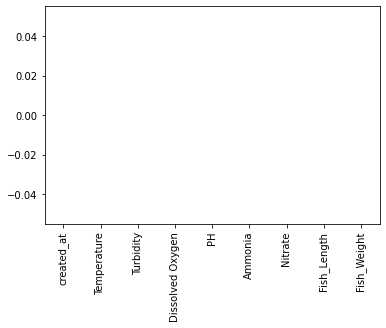

In [8]:
df_raw1.isna().sum().plot.bar()

Data Covariance and Correlation

In [9]:
corr = df_raw1.corr()
corr

<ipython-input-9-96a202d342d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_raw1.corr()


,Temperature,Turbidity,Dissolved Oxygen,PH,Ammonia,Nitrate,Fish_Length,Fish_Weight
Temperature,1.000000,0.115116,0.086174,-0.037783,0.010224,0.088641,-0.019664,-0.024597
Turbidity,0.115116,1.000000,-0.029793,0.345595,0.077227,0.000061,-0.236284,-0.314932
Dissolved Oxygen,0.086174,-0.029793,1.000000,-0.226317,-0.014587,-0.160864,0.010151,0.008291
PH,-0.037783,0.345595,-0.226317,1.000000,0.037715,0.164186,-0.066024,-0.082584
Ammonia,0.010224,0.077227,-0.014587,0.037715,1.000000,0.135740,0.006217,0.014823
Nitrate,0.088641,0.000061,-0.160864,0.164186,0.135740,1.000000,0.086204,0.129179
Fish_Length,-0.019664,-0.236284,0.010151,-0.066024,0.006217,0.086204,1.000000,0.979886
Fish_Weight,-0.024597,-0.314932,0.008291,-0.082584,0.014823,0.129179,0.979886,1.000000


<AxesSubplot:>

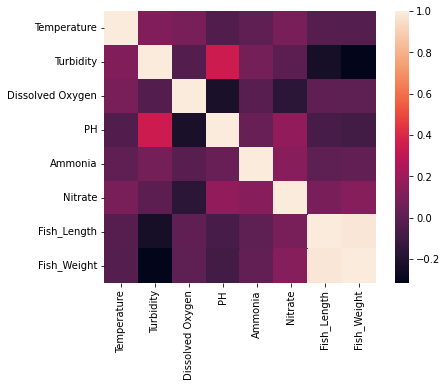

In [10]:
fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr, square=True)

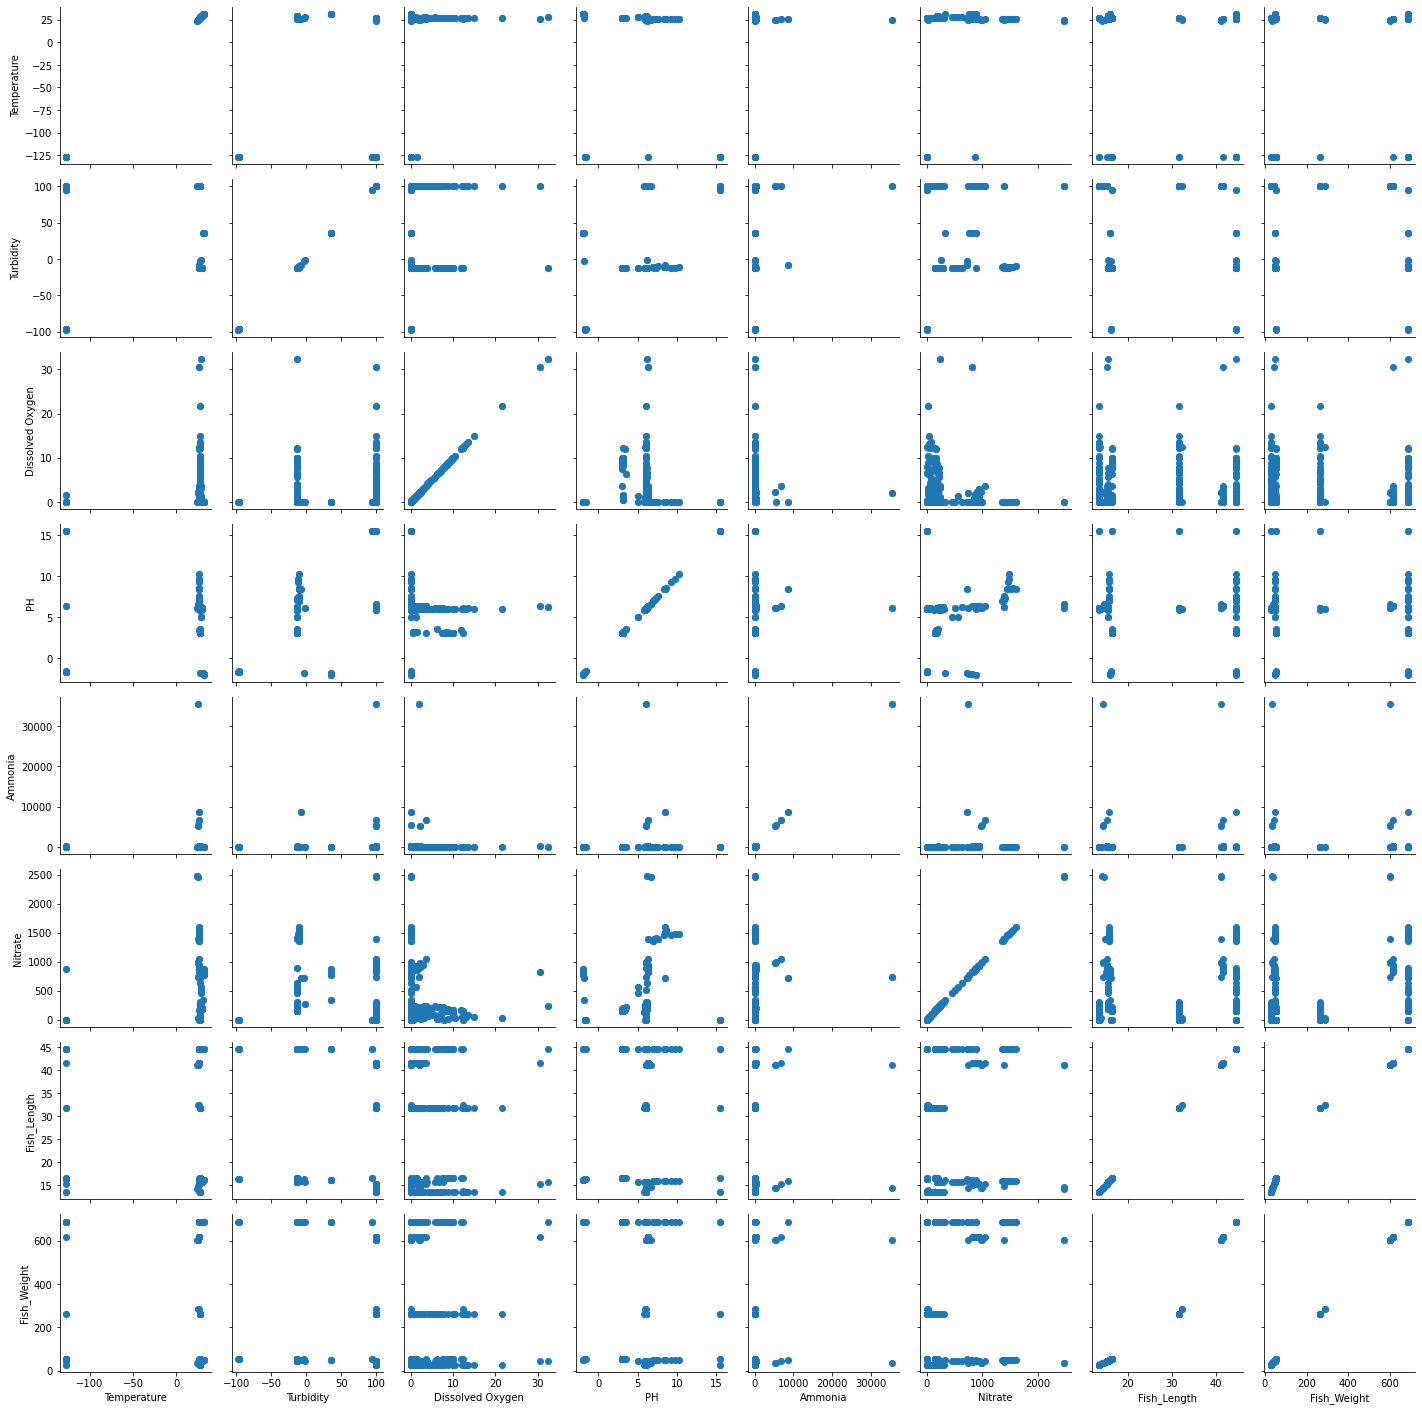

In [11]:
g = sns.PairGrid(df_raw1)
g.map(plt.scatter)

Find outliers and view the data distribution using a histogram

Using a histogram, we can see how the data is distributed. Having data that follows a normal distribution is necessary for some of the statistical techniques used to detect outliers. If the data doesn’t follow a normal distribution, the z-score calculation shouldn’t be used to find the outliers. 

<AxesSubplot:xlabel='Temperature'>

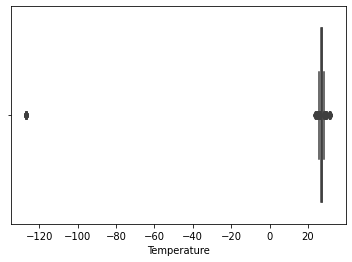

In [12]:
sns.boxplot(x=df_raw1['Temperature'])

<AxesSubplot:xlabel='Turbidity'>

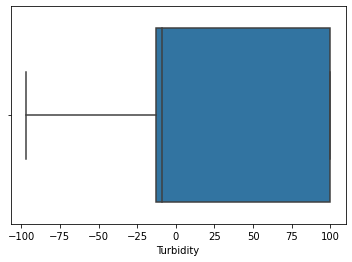

In [13]:
sns.boxplot(x=df_raw1['Turbidity'])

<AxesSubplot:xlabel='Dissolved Oxygen'>

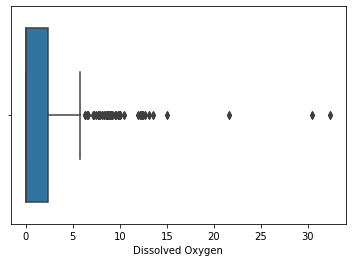

In [14]:
sns.boxplot(x=df_raw1['Dissolved Oxygen'])

<AxesSubplot:xlabel='PH'>

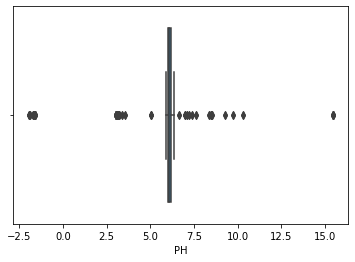

In [15]:
sns.boxplot(x=df_raw1['PH'])

<AxesSubplot:xlabel='Ammonia'>

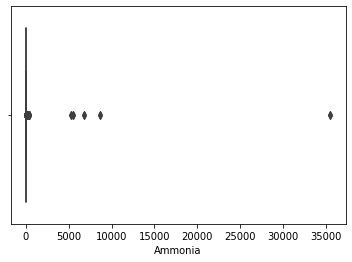

In [16]:
sns.boxplot(x=df_raw1['Ammonia'])

<AxesSubplot:xlabel='Nitrate'>

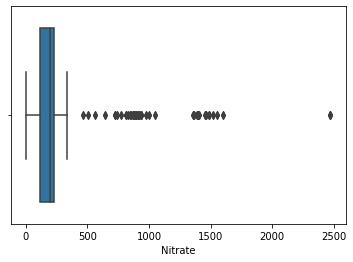

In [17]:
sns.boxplot(x=df_raw1['Nitrate'])

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

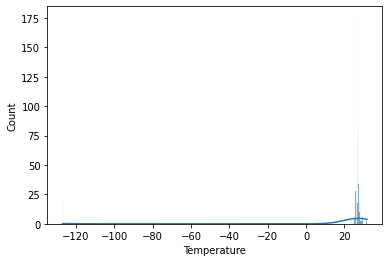

In [18]:
sns.histplot(df_raw1['Temperature'], kde=True)


<AxesSubplot:xlabel='Turbidity', ylabel='Count'>

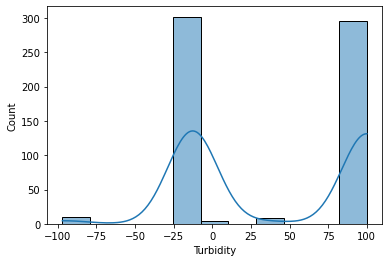

In [19]:
sns.histplot(df_raw1['Turbidity'], kde=True)


<AxesSubplot:xlabel='Dissolved Oxygen', ylabel='Count'>

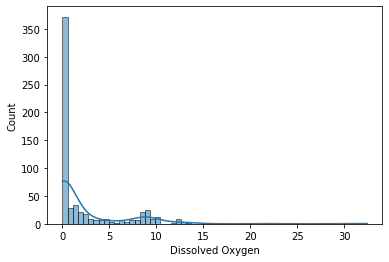

In [20]:
sns.histplot(df_raw1['Dissolved Oxygen'], kde=True)


<AxesSubplot:xlabel='PH', ylabel='Count'>

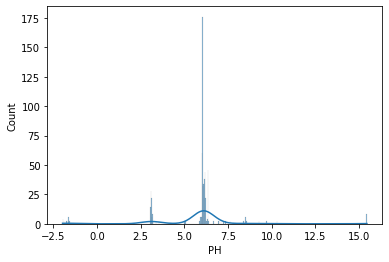

In [21]:
sns.histplot(df_raw1['PH'], kde=True)


<AxesSubplot:xlabel='Nitrate', ylabel='Count'>

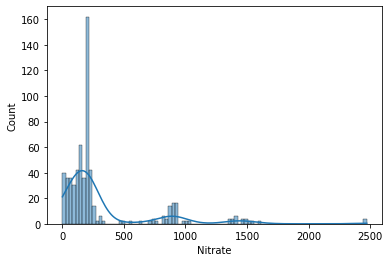

In [22]:
sns.histplot(df_raw1['Nitrate'], kde=True)